# How to Gather Personal Playlist Data from Spotify API

In order to obtain data from the Spotify API you need to create an app in 'Spotify for Developers'. You can find the guides here: https://developer.spotify.com/documentation/general/guides/app-settings/
<br/><br/>
After you have created the app, you should have a username, client id, client secret id and you have to specify a redirect uri within your app. Make sure to also specify the scope of your inquiry.

Spotify API: https://developer.spotify.com/documentation/web-api/reference/tracks/

Now that we have our Spotify credentials...
I used this code from https://github.com/sejaldua/lyrical-sentiment-analysis/blob/master/.ipynb_checkpoints/public_code-checkpoint.ipynb

In [4]:
#!pip install spotipy
import spotipy as sp
import numpy
from spotipy.oauth2 import SpotifyClientCredentials


username='izzy730'
client_id = '64cb58457d8a44e98b93b1761b82be6d'
client_secret = '03500ec43fef4db6933523d4d5b43304'
redirecturi='izzys-personal-playlist://callback'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = sp.Spotify(client_credentials_manager=client_credentials_manager)
plists = {}

def get_features_for_playlist(uri):
    playlist_id = uri.split(':')[2]
    results = sp.user_playlist(username, playlist_id)
    
    #print(json.dumps(results, indent=4))               # uncomment this if you want to visualize the JSON structure
    
    playlist_name = results['name']
    plists[playlist_name] = {}
    plists[playlist_name]['name'] = []
    plists[playlist_name]['track uri'] = []
    #plists[playlist_name]['artist'] = []
    plists[playlist_name]['acousticness'] = []
    plists[playlist_name]['danceability'] = []
    plists[playlist_name]['energy'] = []
    plists[playlist_name]['instrumentalness'] = []
    plists[playlist_name]['liveness'] = []
    plists[playlist_name]['loudness'] = []
    plists[playlist_name]['speechiness'] = []
    plists[playlist_name]['tempo'] = []
    plists[playlist_name]['valence'] = []
    plists[playlist_name]['popularity'] = []

    for track in results['tracks']['items']:
        
        # print(json.dumps(track, indent=4))              # DEBUG STATEMENT
        name = track['track']['name']
        print(name)
        track_uri = track['track']['uri']
        #artist = track['track']['artists']
        
        plists[playlist_name]['name'].append(name)
        plists[playlist_name]['track uri'].append(track_uri)
        #plists[playlist_name]['artist'].append(artist)
        

        features = sp.audio_features(track_uri)
        plists[playlist_name]['acousticness'].append(features[0]['acousticness'])
        plists[playlist_name]['danceability'].append(features[0]['danceability'])
        plists[playlist_name]['energy'].append(features[0]['energy'])
        plists[playlist_name]['instrumentalness'].append(features[0]['instrumentalness'])
        plists[playlist_name]['liveness'].append(features[0]['liveness'])
        plists[playlist_name]['loudness'].append(features[0]['loudness'])
        plists[playlist_name]['speechiness'].append(features[0]['speechiness'])
        plists[playlist_name]['tempo'].append(features[0]['tempo'])
        plists[playlist_name]['valence'].append(features[0]['valence'])
    
# Three of my personal playlists 
    uris = ['spotify:playlist:37i9dQZF1DXaMu9xyX1HzK', 'spotify:playlist:37i9dQZF1EtkXRUBe6Gwsv', 'spotify:playlist:37i9dQZF1EjsoXeGR7MZ0Q']
for uri in uris:
        get_features_for_playlist(uri)

print(plists)

I Like Me Better
Beautiful People (feat. Khalid)
Sucker
Youngblood
Without Me
Beautiful (feat. Camila Cabello)
The Middle
Happier
thank u, next
Someone You Loved
Let Me Go (with Alesso, Florida Georgia Line & watt)
Tequila
It's You
7 rings
Dancing With A Stranger (with Normani)
Scars To Your Beautiful
Little Do You Know
You Need To Calm Down
Señorita
The Bones
Say You Won't Let Go
Circles
Blank Space
Sit Still, Look Pretty
Girls Like You (feat. Cardi B)
Stereo Hearts (feat. Adam Levine)
Trampoline (with ZAYN)
Please Don't Go
Treat You Better
Starving
Story of My Life
Meant to Be (feat. Florida Georgia Line)
YOUTH
Me And My Broken Heart
Classic
Sorry Not Sorry
Sweet but Psycho
Shout Out to My Ex
Sunflower - Spider-Man: Into the Spider-Verse
Delicate
There's Nothing Holdin' Me Back
High Hopes
Drag Me Down
Never Be the Same
One Thing Right
I'll Be There
Young Dumb & Broke
Mine
What Makes You Beautiful
no tears left to cry
Stay
1950
Slow Hands
Good as Hell
when the party's over
Closer
Best

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Best of the Decade For You
ACOUSTICNESS | median: 0.12 | mean: 0.2257636
DANCEABILITY | median: 0.681 | mean: 0.6575500000000001
ENERGY | median: 0.655 | mean: 0.625575
INSTRUMENTALNESS | median: 0.0 | mean: 0.00014538390000000002
LIVENESS | median: 0.1175 | mean: 0.150748
LOUDNESS | median: -5.630000000000001 | mean: -5.840709999999999
SPEECHINESS | median: 0.058550000000000005 | mean: 0.08663700000000002
TEMPO | median: 106.988 | mean: 111.90808999999999
VALENCE | median: 0.488 | mean: 0.491661
POPULARITY | median: nan | mean: nan
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Your Top Songs 2019
ACOUSTICNESS | median: 0.167 | mean: 0.255446558
DANCEABILITY | median: 0.674 | mean: 0.65664
ENERGY | median: 0.6425000000000001 | mean: 0.62054
INSTRUMENTALNESS | median: 1.3205e-05 | mean: 0.05395994830000001
LIVENESS | median: 0.118 | mean: 0.17697
LOUDNESS | median: -6.9055 | mean: -7.38054
SPEECHINESS | median: 

C:\Users\isali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\isali\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


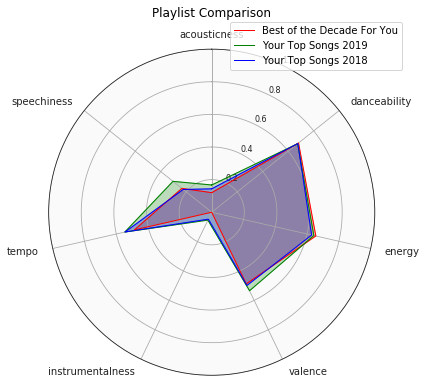

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# manually inspect all of the values to determine whether the median or mean is a better metric to plot
for playlist in plists:
    print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––")
    print(playlist)
    for feature in plists[playlist]:
        if feature != 'name' and feature != 'track uri':
            print(feature.upper(), "| median:", np.median(plists[playlist][feature]), "| mean:", np.mean(plists[playlist][feature]))
    

labels = ['acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'tempo', 'speechiness']
num_vars = len(labels)

# Split the circle into even parts and save the angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each playlist on the radar chart.
def add_to_radar(playlist, color):
    values = [np.median(plists[playlist]['acousticness']), np.median(plists[playlist]['danceability']), np.median(plists[playlist]['energy']), 
              np.median(plists[playlist]['valence']), np.mean(plists[playlist]['instrumentalness']), np.median(plists[playlist]['tempo']), 
              np.median(plists[playlist]['speechiness'])]
    # tempo values typically range from 50-220, so I divided by 220 to get a number between 0 and 1
    values[-2] = values[-2]/220
    # speechiness values values are highly concentrated between 0 and 0.25-ish, so I multiplied by 4. Adjust this if needed
    values[-1] = values[-1]*4
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=playlist)
    ax.fill(angles, values, color=color, alpha=0.25)

# # Add each additional playlist to the chart.
add_to_radar('Best of the Decade For You', 'red')
add_to_radar('Your Top Songs 2019', 'green')
add_to_radar('Your Top Songs 2018', 'blue')

# polar coordinates math stuff
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
ax.tick_params(colors='#222222')         # color of tick labels
ax.tick_params(axis='y', labelsize=8)    # y-axis labels
ax.grid(color='#AAAAAA')                 # color of circular gridlines
ax.spines['polar'].set_color('#222222')  # color of outermost gridline (spine)
ax.set_facecolor('#FAFAFA')              # background color inside the circle itself

#Lastly, give the chart a title and a legend
ax.set_title('Playlist Comparison', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

fig.savefig('playlist_comp.png')

Looks like my music choice hasn't changed much over the years!

## Data Formatting and Cleaning

In [12]:
izzy_df = pd.DataFrame(plists)
izzy_df.head(10)

,Best of the Decade For You,Your Top Songs 2019,Your Top Songs 2018
acousticness,"[0.535, 0.124, 0.0427, 0.0169, 0.297, 0.346, 0...","[0.149, 0.552, 0.59, 0.179, 0.131, 0.0501, 0.7...","[0.22, 0.0934, 0.771, 0.00381, 0.00989, 0.0956..."
danceability,"[0.752, 0.64, 0.842, 0.596, 0.752, 0.638, 0.75...","[0.837, 0.487, 0.637, 0.614, 0.686, 0.9, 0.905...","[0.672, 0.567, 0.426, 0.547, 0.322, 0.708, 0.4..."
energy,"[0.505, 0.648, 0.734, 0.854, 0.488, 0.717, 0.6...","[0.364, 0.458, 0.512, 0.719, 0.539, 0.4, 0.389...","[0.899, 0.913, 0.408, 0.901, 0.769, 0.648, 0.4..."
instrumentalness,"[2.55e-06, 0, 0, 0, 9.11e-06, 0, 0, 0, 0, 0, 0...","[0, 0.0257, 0.000464, 1.72e-05, 1.94e-05, 0, 0...","[0.302, 0.000124, 7.88e-06, 0.00395, 0, 0, 0.0..."
liveness,"[0.104, 0.0802, 0.106, 0.124, 0.0936, 0.105, 0...","[0.271, 0.117, 0.0712, 0.163, 0.116, 0.0876, 0...","[0.142, 0.114, 0.394, 0.682, 0.185, 0.134, 0.1..."
loudness,"[-7.621, -8.113, -5.065, -5.114, -7.05, -4.722...","[-11.713, -7.761, -10.027, -4.694, -8.623, -8....","[-6.878, -6.471, -9.419, -3.627, -5.858, -5.62..."
name,"[I Like Me Better, Beautiful People (feat. Kha...","[MIDDLE CHILD, Vertigo, Sandstorm (feat. JID),...","[Let Me Down Easy, Nice For What, Paris in the..."
popularity,[],[],[]
speechiness,"[0.253, 0.187, 0.0588, 0.463, 0.0705, 0.0337, ...","[0.276, 0.0371, 0.0978, 0.0955, 0.0349, 0.124,...","[0.0323, 0.0736, 0.0524, 0.0512, 0.0371, 0.044..."
tempo,"[91.97, 92.977, 137.958, 120.274, 136.041, 100...","[123.984, 115.989, 109.492, 160.075, 115.987, ...","[139.01, 93.35, 76.309, 125.854, 144.48, 143.9..."


In [13]:
bestofdecade_df = izzy_df['Best of the Decade For You']
izzy2019_df = izzy_df['Your Top Songs 2019']
izzy2018_df = izzy_df['Your Top Songs 2018']

In [14]:
bestofdecade_df = pd.DataFrame(bestofdecade_df)
bestofdecade_df.reset_index(level=0, inplace=True)
bestofdecade_df

,index,Best of the Decade For You
0,acousticness,"[0.535, 0.124, 0.0427, 0.0169, 0.297, 0.346, 0..."
1,danceability,"[0.752, 0.64, 0.842, 0.596, 0.752, 0.638, 0.75..."
2,energy,"[0.505, 0.648, 0.734, 0.854, 0.488, 0.717, 0.6..."
3,instrumentalness,"[2.55e-06, 0, 0, 0, 9.11e-06, 0, 0, 0, 0, 0, 0..."
4,liveness,"[0.104, 0.0802, 0.106, 0.124, 0.0936, 0.105, 0..."
5,loudness,"[-7.621, -8.113, -5.065, -5.114, -7.05, -4.722..."
6,name,"[I Like Me Better, Beautiful People (feat. Kha..."
7,popularity,[]
8,speechiness,"[0.253, 0.187, 0.0588, 0.463, 0.0705, 0.0337, ..."
9,tempo,"[91.97, 92.977, 137.958, 120.274, 136.041, 100..."


In [15]:
df2 = pd.DataFrame(bestofdecade_df)
df3 = pd.DataFrame(df2['Best of the Decade For You'].values.tolist())
bestofdecade_df = df3.T
bestofdecade_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.535,0.752,0.505,2.55e-06,0.104,-7.621,I Like Me Better,None,0.253,91.97,spotify:track:2P91MQbaiQOfbiz9VqhqKQ,0.419
1,0.124,0.64,0.648,0,0.0802,-8.113,Beautiful People (feat. Khalid),None,0.187,92.977,spotify:track:70eFcWOvlMObDhURTqT4Fv,0.548
2,0.0427,0.842,0.734,0,0.106,-5.065,Sucker,None,0.0588,137.958,spotify:track:22vgEDb5hykfaTwLuskFGD,0.952
3,0.0169,0.596,0.854,0,0.124,-5.114,Youngblood,None,0.463,120.274,spotify:track:2iUXsYOEPhVqEBwsqP70rE,0.152
4,0.297,0.752,0.488,9.11e-06,0.0936,-7.05,Without Me,None,0.0705,136.041,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533


In [16]:
bestofdecade_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(bestofdecade_df.columns)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


In [17]:
bestofdecade_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,track,popularity,speechiness,tempo,track_uri,valence
0,0.535,0.752,0.505,2.55e-06,0.104,-7.621,I Like Me Better,None,0.253,91.97,spotify:track:2P91MQbaiQOfbiz9VqhqKQ,0.419
1,0.124,0.64,0.648,0,0.0802,-8.113,Beautiful People (feat. Khalid),None,0.187,92.977,spotify:track:70eFcWOvlMObDhURTqT4Fv,0.548
2,0.0427,0.842,0.734,0,0.106,-5.065,Sucker,None,0.0588,137.958,spotify:track:22vgEDb5hykfaTwLuskFGD,0.952
3,0.0169,0.596,0.854,0,0.124,-5.114,Youngblood,None,0.463,120.274,spotify:track:2iUXsYOEPhVqEBwsqP70rE,0.152
4,0.297,0.752,0.488,9.11e-06,0.0936,-7.05,Without Me,None,0.0705,136.041,spotify:track:5p7ujcrUXASCNwRaWNHR1C,0.533
5,0.346,0.638,0.717,0,0.105,-4.722,Beautiful (feat. Camila Cabello),None,0.0337,100.027,spotify:track:4VUwkH455At9kENOfzTqmF,0.249
6,0.171,0.753,0.657,0,0.112,-3.061,The Middle,None,0.0449,107.01,spotify:track:09IStsImFySgyp0pIQdqAc,0.437
7,0.191,0.687,0.792,0,0.167,-2.749,Happier,None,0.0452,100.015,spotify:track:2dpaYNEQHiRxtZbfNsse99,0.671
8,0.229,0.717,0.653,0,0.101,-5.634,"thank u, next",None,0.0658,106.966,spotify:track:3e9HZxeyfWwjeyPAMmWSSQ,0.412
9,0.751,0.501,0.405,0,0.105,-5.679,Someone You Loved,None,0.0319,109.891,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.446


In [18]:
bestofdecade_df = bestofdecade_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
bestofdecade_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.535,0.752,0.505,0.104,-7.621,I Like Me Better,0.253,91.97,0.419
1,0.124,0.64,0.648,0.0802,-8.113,Beautiful People (feat. Khalid),0.187,92.977,0.548
2,0.0427,0.842,0.734,0.106,-5.065,Sucker,0.0588,137.958,0.952
3,0.0169,0.596,0.854,0.124,-5.114,Youngblood,0.463,120.274,0.152
4,0.297,0.752,0.488,0.0936,-7.05,Without Me,0.0705,136.041,0.533


In [19]:
bestofdecade_df = bestofdecade_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
bestofdecade_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,I Like Me Better,0.535,0.752,0.505,0.104,-7.621,0.253,91.97,0.419
1,Beautiful People (feat. Khalid),0.124,0.64,0.648,0.0802,-8.113,0.187,92.977,0.548
2,Sucker,0.0427,0.842,0.734,0.106,-5.065,0.0588,137.958,0.952
3,Youngblood,0.0169,0.596,0.854,0.124,-5.114,0.463,120.274,0.152
4,Without Me,0.297,0.752,0.488,0.0936,-7.05,0.0705,136.041,0.533


Let's do the same for our 2nd and 3rd playlists.

In [20]:
izzy2019_df = izzy_df['Your Top Songs 2019']
izzy2019_df = pd.DataFrame(izzy2019_df)
izzy2019_df.reset_index(level=0, inplace=True)
izzy2019_df

,index,Your Top Songs 2019
0,acousticness,"[0.149, 0.552, 0.59, 0.179, 0.131, 0.0501, 0.7..."
1,danceability,"[0.837, 0.487, 0.637, 0.614, 0.686, 0.9, 0.905..."
2,energy,"[0.364, 0.458, 0.512, 0.719, 0.539, 0.4, 0.389..."
3,instrumentalness,"[0, 0.0257, 0.000464, 1.72e-05, 1.94e-05, 0, 0..."
4,liveness,"[0.271, 0.117, 0.0712, 0.163, 0.116, 0.0876, 0..."
5,loudness,"[-11.713, -7.761, -10.027, -4.694, -8.623, -8...."
6,name,"[MIDDLE CHILD, Vertigo, Sandstorm (feat. JID),..."
7,popularity,[]
8,speechiness,"[0.276, 0.0371, 0.0978, 0.0955, 0.0349, 0.124,..."
9,tempo,"[123.984, 115.989, 109.492, 160.075, 115.987, ..."


In [21]:
df2 = pd.DataFrame(izzy2019_df)
df3 = pd.DataFrame(df2['Your Top Songs 2019'].values.tolist())
izzy2019_df = df3.T
izzy2019_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.149,0.837,0.364,0,0.271,-11.713,MIDDLE CHILD,None,0.276,123.984,spotify:track:2JvzF1RMd7lE3KmFlsyZD8,0.463
1,0.552,0.487,0.458,0.0257,0.117,-7.761,Vertigo,None,0.0371,115.989,spotify:track:06GcodDliPWAYFX2LSFLIu,0.207
2,0.59,0.637,0.512,0.000464,0.0712,-10.027,Sandstorm (feat. JID),None,0.0978,109.492,spotify:track:1NlWBpNYAnFT7gMGyC0Y1M,0.33
3,0.179,0.614,0.719,1.72e-05,0.163,-4.694,Hard Place,None,0.0955,160.075,spotify:track:47OqtEbWGkG6eDNGUNCYYB,0.34
4,0.131,0.686,0.539,1.94e-05,0.116,-8.623,Groceries,None,0.0349,115.987,spotify:track:706J9prVXY8vZHhp9VGiBE,0.186


In [22]:
izzy2019_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(izzy2019_df.columns)
izzy2019_df.head()

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


,acousticness,danceability,energy,instrumentalness,liveness,loudness,track,popularity,speechiness,tempo,track_uri,valence
0,0.149,0.837,0.364,0,0.271,-11.713,MIDDLE CHILD,None,0.276,123.984,spotify:track:2JvzF1RMd7lE3KmFlsyZD8,0.463
1,0.552,0.487,0.458,0.0257,0.117,-7.761,Vertigo,None,0.0371,115.989,spotify:track:06GcodDliPWAYFX2LSFLIu,0.207
2,0.59,0.637,0.512,0.000464,0.0712,-10.027,Sandstorm (feat. JID),None,0.0978,109.492,spotify:track:1NlWBpNYAnFT7gMGyC0Y1M,0.33
3,0.179,0.614,0.719,1.72e-05,0.163,-4.694,Hard Place,None,0.0955,160.075,spotify:track:47OqtEbWGkG6eDNGUNCYYB,0.34
4,0.131,0.686,0.539,1.94e-05,0.116,-8.623,Groceries,None,0.0349,115.987,spotify:track:706J9prVXY8vZHhp9VGiBE,0.186


In [23]:
izzy2019_df = izzy2019_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
izzy2019_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.149,0.837,0.364,0.271,-11.713,MIDDLE CHILD,0.276,123.984,0.463
1,0.552,0.487,0.458,0.117,-7.761,Vertigo,0.0371,115.989,0.207
2,0.59,0.637,0.512,0.0712,-10.027,Sandstorm (feat. JID),0.0978,109.492,0.33
3,0.179,0.614,0.719,0.163,-4.694,Hard Place,0.0955,160.075,0.34
4,0.131,0.686,0.539,0.116,-8.623,Groceries,0.0349,115.987,0.186


In [24]:
izzy2019_df = izzy2019_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
izzy2019_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,MIDDLE CHILD,0.149,0.837,0.364,0.271,-11.713,0.276,123.984,0.463
1,Vertigo,0.552,0.487,0.458,0.117,-7.761,0.0371,115.989,0.207
2,Sandstorm (feat. JID),0.59,0.637,0.512,0.0712,-10.027,0.0978,109.492,0.33
3,Hard Place,0.179,0.614,0.719,0.163,-4.694,0.0955,160.075,0.34
4,Groceries,0.131,0.686,0.539,0.116,-8.623,0.0349,115.987,0.186


In [25]:
izzy2018_df = izzy_df['Your Top Songs 2018']
izzy2018_df = pd.DataFrame(izzy2018_df)
izzy2018_df.reset_index(level=0, inplace=True)
izzy2018_df

,index,Your Top Songs 2018
0,acousticness,"[0.22, 0.0934, 0.771, 0.00381, 0.00989, 0.0956..."
1,danceability,"[0.672, 0.567, 0.426, 0.547, 0.322, 0.708, 0.4..."
2,energy,"[0.899, 0.913, 0.408, 0.901, 0.769, 0.648, 0.4..."
3,instrumentalness,"[0.302, 0.000124, 7.88e-06, 0.00395, 0, 0, 0.0..."
4,liveness,"[0.142, 0.114, 0.394, 0.682, 0.185, 0.134, 0.1..."
5,loudness,"[-6.878, -6.471, -9.419, -3.627, -5.858, -5.62..."
6,name,"[Let Me Down Easy, Nice For What, Paris in the..."
7,popularity,[]
8,speechiness,"[0.0323, 0.0736, 0.0524, 0.0512, 0.0371, 0.044..."
9,tempo,"[139.01, 93.35, 76.309, 125.854, 144.48, 143.9..."


In [26]:
df2 = pd.DataFrame(izzy2018_df)
df3 = pd.DataFrame(df2['Your Top Songs 2018'].values.tolist())
izzy2018_df = df3.T
izzy2018_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.22,0.672,0.899,0.302,0.142,-6.878,Let Me Down Easy,None,0.0323,139.01,spotify:track:7DPQwyMQADl9Y8oSvSVpfg,0.927
1,0.0934,0.567,0.913,0.000124,0.114,-6.471,Nice For What,None,0.0736,93.35,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,0.792
2,0.771,0.426,0.408,7.88e-06,0.394,-9.419,Paris in the Rain,None,0.0524,76.309,spotify:track:0RGUIOZtmOXTWOy5EjvQbP,0.528
3,0.00381,0.547,0.901,0.00395,0.682,-3.627,Slow (feat. Noah Cyrus) - CID Remix,None,0.0512,125.854,spotify:track:3vHyrKNvqFvanTgymPXMSN,0.257
4,0.00989,0.322,0.769,0,0.185,-5.858,Kick On,None,0.0371,144.48,spotify:track:4fbDfF6zuNcdqzI9cyK5hE,0.508


In [27]:
izzy2018_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(izzy2018_df.columns)
izzy2018_df.head()

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


,acousticness,danceability,energy,instrumentalness,liveness,loudness,track,popularity,speechiness,tempo,track_uri,valence
0,0.22,0.672,0.899,0.302,0.142,-6.878,Let Me Down Easy,None,0.0323,139.01,spotify:track:7DPQwyMQADl9Y8oSvSVpfg,0.927
1,0.0934,0.567,0.913,0.000124,0.114,-6.471,Nice For What,None,0.0736,93.35,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,0.792
2,0.771,0.426,0.408,7.88e-06,0.394,-9.419,Paris in the Rain,None,0.0524,76.309,spotify:track:0RGUIOZtmOXTWOy5EjvQbP,0.528
3,0.00381,0.547,0.901,0.00395,0.682,-3.627,Slow (feat. Noah Cyrus) - CID Remix,None,0.0512,125.854,spotify:track:3vHyrKNvqFvanTgymPXMSN,0.257
4,0.00989,0.322,0.769,0,0.185,-5.858,Kick On,None,0.0371,144.48,spotify:track:4fbDfF6zuNcdqzI9cyK5hE,0.508


In [28]:
izzy2018_df = izzy2018_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
izzy2018_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.22,0.672,0.899,0.142,-6.878,Let Me Down Easy,0.0323,139.01,0.927
1,0.0934,0.567,0.913,0.114,-6.471,Nice For What,0.0736,93.35,0.792
2,0.771,0.426,0.408,0.394,-9.419,Paris in the Rain,0.0524,76.309,0.528
3,0.00381,0.547,0.901,0.682,-3.627,Slow (feat. Noah Cyrus) - CID Remix,0.0512,125.854,0.257
4,0.00989,0.322,0.769,0.185,-5.858,Kick On,0.0371,144.48,0.508


In [29]:
izzy2018_df = izzy2018_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
izzy2018_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Let Me Down Easy,0.22,0.672,0.899,0.142,-6.878,0.0323,139.01,0.927
1,Nice For What,0.0934,0.567,0.913,0.114,-6.471,0.0736,93.35,0.792
2,Paris in the Rain,0.771,0.426,0.408,0.394,-9.419,0.0524,76.309,0.528
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.682,-3.627,0.0512,125.854,0.257
4,Kick On,0.00989,0.322,0.769,0.185,-5.858,0.0371,144.48,0.508


In [30]:
# Save dataframes to csv

izzy2018_df.to_csv('izzy2018_df.csv', index=False)
izzy2019_df.to_csv('izzy2019_df.csv', index=False)
bestofdecade_df.to_csv('bestofdecade_df.csv', index=False)

# Data for Mood Project

In [33]:
#!pip install spotipy
import spotipy as sp
import numpy
from spotipy.oauth2 import SpotifyClientCredentials


username='izzy730'
client_id = '64cb58457d8a44e98b93b1761b82be6d'
client_secret = '03500ec43fef4db6933523d4d5b43304'
redirecturi='izzys-personal-playlist://callback'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = sp.Spotify(client_credentials_manager=client_credentials_manager)
plists = {}

def get_features_for_playlist_moods(uri):
    playlist_id = uri.split(':')[2]
    results = sp.user_playlist(username, playlist_id)
    
    #print(json.dumps(results, indent=4))               # uncomment this if you want to visualize the JSON structure
    
    playlist_name = results['name']
    plists[playlist_name] = {}
    plists[playlist_name]['name'] = []
    plists[playlist_name]['track uri'] = []
    #plists[playlist_name]['artist'] = []
    plists[playlist_name]['acousticness'] = []
    plists[playlist_name]['danceability'] = []
    plists[playlist_name]['energy'] = []
    plists[playlist_name]['instrumentalness'] = []
    plists[playlist_name]['liveness'] = []
    plists[playlist_name]['loudness'] = []
    plists[playlist_name]['speechiness'] = []
    plists[playlist_name]['tempo'] = []
    plists[playlist_name]['valence'] = []
    plists[playlist_name]['popularity'] = []

    for track in results['tracks']['items']:
        
        # print(json.dumps(track, indent=4))              # DEBUG STATEMENT
        name = track['track']['name']
        print(name)
        track_uri = track['track']['uri']
        #artist = track['track']['artists']
        
        plists[playlist_name]['name'].append(name)
        plists[playlist_name]['track uri'].append(track_uri)
        #plists[playlist_name]['artist'].append(artist)
        

        features = sp.audio_features(track_uri)
        plists[playlist_name]['acousticness'].append(features[0]['acousticness'])
        plists[playlist_name]['danceability'].append(features[0]['danceability'])
        plists[playlist_name]['energy'].append(features[0]['energy'])
        plists[playlist_name]['instrumentalness'].append(features[0]['instrumentalness'])
        plists[playlist_name]['liveness'].append(features[0]['liveness'])
        plists[playlist_name]['loudness'].append(features[0]['loudness'])
        plists[playlist_name]['speechiness'].append(features[0]['speechiness'])
        plists[playlist_name]['tempo'].append(features[0]['tempo'])
        plists[playlist_name]['valence'].append(features[0]['valence'])
    
uris = ['spotify:playlist:77U18YvsyX4CAqwf1nOtxL', 'spotify:playlist:6t7XjpeXj5Rg6wZKBuYmoC', 'spotify:playlist:6ARLNTsHp53YnfwWzqufPQ']
for uri in uris:
        get_features_for_playlist(uri)

print(plists)

Autumn Leaves - Deluxe Edition
I'm Not The Only One
If I Ever Feel Better
Electric Love
lovers’ carvings
You’re Not The One
#88
Hold Back The River
Warm Foothills
Gold on the Ceiling
Oblivion
505
Oceans (Where Feet May Fail)
Mr Quiche
Repeat Pleasure
One More (feat. MØ)
Thinking out Loud
Stay With Me
When We're Fire
Every Other Freckle
I Blame Myself
Purple Yellow Red and Blue
Where Are You Now
Creep in a T-Shirt
First Day Of My Life
The Girl
The Sun
Beautiful Girl
Left Hand Free
Awake My Soul
Leave Your Lover
Waiting Game
The Mother We Share
Kiss Me
Genesis
We Don't Eat
Big Black Car
Don't Wanna Dance
I'd Rather Be with You
Lovers' Eyes
Skinny Love
Atomic Man
Free Fallin' - Live at the Nokia Theatre, Los Angeles, CA - December 2007
Hip Hop Kids
Broken Brights
XO
Like Real People Do
Out Of Mind
Slow Dancing in a Burning Room
You & Me
Wildfire
My My Love
Such Great Heights
Flaws
All I Want
Only You
Hunger Of The Pine
Cherry Wine - Live
Got It All (This Can't Be Living Now)
Let Her Go
XO

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Rainy Days
ACOUSTICNESS | median: 0.40700000000000003 | mean: 0.42008919999999994
DANCEABILITY | median: 0.544 | mean: 0.52683
ENERGY | median: 0.4685 | mean: 0.501618
INSTRUMENTALNESS | median: 0.0001155 | mean: 0.0654516228
LIVENESS | median: 0.1115 | mean: 0.161298
LOUDNESS | median: -8.669 | mean: -8.874679999999998
SPEECHINESS | median: 0.038349999999999995 | mean: 0.050561999999999996
TEMPO | median: 119.815 | mean: 117.48869
VALENCE | median: 0.362 | mean: 0.39296899999999996
POPULARITY | median: nan | mean: nan
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Peaches
ACOUSTICNESS | median: 0.136 | mean: 0.21741981000000002
DANCEABILITY | median: 0.585 | mean: 0.5822600000000001
ENERGY | median: 0.7 | mean: 0.65168
INSTRUMENTALNESS | median: 5.3099999999999996e-05 | mean: 0.031156237499999996
LIVENESS | median: 0.133 | mean: 0.18304499999999999
LOUDNESS | median: -6.4995 | mean: -7.09713
SPEECHINESS | media

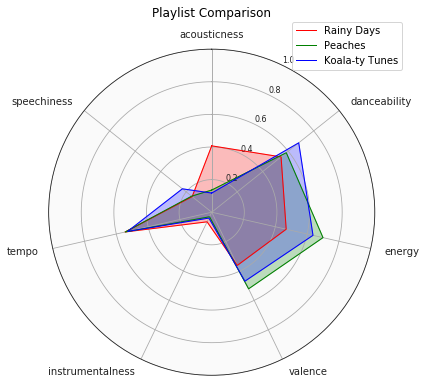

In [34]:
# manually inspect all of the values to determine whether the median or mean is a better metric to plot
for playlist in plists:
    print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––")
    print(playlist)
    for feature in plists[playlist]:
        if feature != 'name' and feature != 'track uri':
            print(feature.upper(), "| median:", np.median(plists[playlist][feature]), "| mean:", np.mean(plists[playlist][feature]))
    

labels = ['acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'tempo', 'speechiness']
num_vars = len(labels)

# Split the circle into even parts and save the angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each playlist on the radar chart.
def add_to_radar(playlist, color):
    values = [np.median(plists[playlist]['acousticness']), np.median(plists[playlist]['danceability']), np.median(plists[playlist]['energy']), 
              np.median(plists[playlist]['valence']), np.mean(plists[playlist]['instrumentalness']), np.median(plists[playlist]['tempo']), 
              np.median(plists[playlist]['speechiness'])]
    # tempo values typically range from 50-220, so I divided by 220 to get a number between 0 and 1
    values[-2] = values[-2]/220
    # speechiness values values are highly concentrated between 0 and 0.25-ish, so I multiplied by 4. Adjust this if needed
    values[-1] = values[-1]*4
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=playlist)
    ax.fill(angles, values, color=color, alpha=0.25)

# # Add each additional playlist to the chart.
add_to_radar('Rainy Days', 'red')
add_to_radar('Peaches', 'green')
add_to_radar('Koala-ty Tunes', 'blue')

# polar coordinates math stuff
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
ax.tick_params(colors='#222222')         # color of tick labels
ax.tick_params(axis='y', labelsize=8)    # y-axis labels
ax.grid(color='#AAAAAA')                 # color of circular gridlines
ax.spines['polar'].set_color('#222222')  # color of outermost gridline (spine)
ax.set_facecolor('#FAFAFA')              # background color inside the circle itself

#Lastly, give the chart a title and a legend
ax.set_title('Playlist Comparison', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

fig.savefig('playlist_comp_2.png')

We an see that there is more variability between the attributes of these three different playlists. We will use this for the personalized mood analysis.

In [35]:
moods_df = pd.DataFrame(plists)
moods_df.head(10)

,Rainy Days,Peaches,Koala-ty Tunes
acousticness,"[0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,...","[0.936, 0.882, 0.0972, 0.239, 0.0634, 0.391, 0...","[0.0934, 0.00989, 0.0164, 0.0956, 0.771, 0.262..."
danceability,"[0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5...","[0.499, 0.592, 0.699, 0.664, 0.476, 0.352, 0.3...","[0.567, 0.322, 0.445, 0.708, 0.426, 0.753, 0.7..."
energy,"[0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33...","[0.159, 0.416, 0.601, 0.76, 0.619, 0.414, 0.43...","[0.913, 0.769, 0.662, 0.648, 0.408, 0.75, 0.74..."
instrumentalness,"[1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0...","[0.000565, 0.000586, 1.17e-05, 2.32e-06, 0.000...","[0.000124, 0, 0, 0, 7.88e-06, 0.00902, 0.395, ..."
liveness,"[0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0...","[0.118, 0.112, 0.562, 0.12, 0.258, 0.185, 0.13...","[0.114, 0.185, 0.219, 0.134, 0.394, 0.0928, 0...."
loudness,"[-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,...","[-16.154, -9.794, -6.48, -4.4, -7.221, -6.6, -...","[-6.471, -5.858, -4.802, -5.626, -9.419, -6.65..."
name,"[Autumn Leaves - Deluxe Edition, I'm Not The O...","[The Girl, Bloom - Bonus Track, Sober, Talk Is...","[Nice For What, Kick On, Alone (Feat. Big Sean..."
popularity,[],[],[]
speechiness,"[0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557...","[0.0337, 0.0246, 0.0304, 0.258, 0.0398, 0.0254...","[0.0736, 0.0371, 0.181, 0.0449, 0.0524, 0.0345..."
tempo,"[89.013, 81.329, 119.7, 120.017, 118.06, 92.00...","[77.691, 96.002, 98.04, 139.999, 117.113, 60.0...","[93.35, 144.48, 200.04, 143.955, 76.309, 117.9..."


In [36]:
chill_df = moods_df['Rainy Days']
cheerful_df = moods_df['Peaches']
energetic_df = moods_df['Koala-ty Tunes']

In [37]:
# chill_df = chill_df.to_frame()
# cheerful_df = cheerful_df.to_frame()
# energetic_df = energetic_df.to_frame()

In [38]:
chill_df = pd.DataFrame(chill_df)
chill_df

,Rainy Days
acousticness,"[0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,..."
danceability,"[0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5..."
energy,"[0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33..."
instrumentalness,"[1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0..."
liveness,"[0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0..."
loudness,"[-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,..."
name,"[Autumn Leaves - Deluxe Edition, I'm Not The O..."
popularity,[]
speechiness,"[0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557..."
tempo,"[89.013, 81.329, 119.7, 120.017, 118.06, 92.00..."


In [39]:
chill_df.reset_index(level=0, inplace=True)
chill_df

,index,Rainy Days
0,acousticness,"[0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,..."
1,danceability,"[0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5..."
2,energy,"[0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33..."
3,instrumentalness,"[1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0..."
4,liveness,"[0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0..."
5,loudness,"[-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,..."
6,name,"[Autumn Leaves - Deluxe Edition, I'm Not The O..."
7,popularity,[]
8,speechiness,"[0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557..."
9,tempo,"[89.013, 81.329, 119.7, 120.017, 118.06, 92.00..."


In [40]:
df2 = pd.DataFrame(chill_df)
print (df2)

               index                                         Rainy Days
0       acousticness  [0.892, 0.562, 0.0492, 0.00448, 0.68, 0.00215,...
1       danceability  [0.555, 0.515, 0.755, 0.621, 0.558, 0.468, 0.5...
2             energy  [0.257, 0.494, 0.553, 0.853, 0.47, 0.966, 0.33...
3   instrumentalness  [1.42e-06, 1.82e-05, 0.00607, 0.0012, 0.914, 0...
4           liveness  [0.124, 0.0771, 0.0646, 0.236, 0.532, 0.132, 0...
5           loudness  [-12.637, -5.78, -9.449, -6.537, -5.5, -3.468,...
6               name  [Autumn Leaves - Deluxe Edition, I'm Not The O...
7         popularity                                                 []
8        speechiness  [0.0299, 0.0416, 0.107, 0.0615, 0.0316, 0.0557...
9              tempo  [89.013, 81.329, 119.7, 120.017, 118.06, 92.00...
10         track uri  [spotify:track:7iBSkXB0pTvZasOLf0Qxk9, spotify...
11           valence  [0.431, 0.474, 0.836, 0.65, 0.427, 0.8, 0.395,...


In [41]:
df3 = pd.DataFrame(df2['Rainy Days'].values.tolist())
print (df3)

                                      0   \
0                                  0.892   
1                                  0.555   
2                                  0.257   
3                               1.42e-06   
4                                  0.124   
5                                -12.637   
6         Autumn Leaves - Deluxe Edition   
7                                   None   
8                                 0.0299   
9                                 89.013   
10  spotify:track:7iBSkXB0pTvZasOLf0Qxk9   
11                                 0.431   

                                      1   \
0                                  0.562   
1                                  0.515   
2                                  0.494   
3                               1.82e-05   
4                                 0.0771   
5                                  -5.78   
6                   I'm Not The Only One   
7                                   None   
8                              

In [42]:
chill_df = df3.T
chill_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.892,0.555,0.257,1.42e-06,0.124,-12.637,Autumn Leaves - Deluxe Edition,None,0.0299,89.013,spotify:track:7iBSkXB0pTvZasOLf0Qxk9,0.431
1,0.562,0.515,0.494,1.82e-05,0.0771,-5.78,I'm Not The Only One,None,0.0416,81.329,spotify:track:4JKDi7xPPKkNAeG8XwBy6h,0.474
2,0.0492,0.755,0.553,0.00607,0.0646,-9.449,If I Ever Feel Better,None,0.107,119.7,spotify:track:3AA8xNhDC0MpqwkGX3EP5V,0.836
3,0.00448,0.621,0.853,0.0012,0.236,-6.537,Electric Love,None,0.0615,120.017,spotify:track:0zulYs8vHhhN0hl8wvYgdv,0.65
4,0.68,0.558,0.47,0.914,0.532,-5.5,lovers’ carvings,None,0.0316,118.06,spotify:track:3JeT6Xcv6MlEHHylk8SKQ1,0.427


In [43]:
chill_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
print(chill_df.columns)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'track', 'popularity', 'speechiness', 'tempo',
       'track_uri', 'valence'],
      dtype='object')


In [44]:
chill_df = chill_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
chill_df.head()

,acousticness,danceability,energy,liveness,loudness,track,speechiness,tempo,valence
0,0.892,0.555,0.257,0.124,-12.637,Autumn Leaves - Deluxe Edition,0.0299,89.013,0.431
1,0.562,0.515,0.494,0.0771,-5.78,I'm Not The Only One,0.0416,81.329,0.474
2,0.0492,0.755,0.553,0.0646,-9.449,If I Ever Feel Better,0.107,119.7,0.836
3,0.00448,0.621,0.853,0.236,-6.537,Electric Love,0.0615,120.017,0.65
4,0.68,0.558,0.47,0.532,-5.5,lovers’ carvings,0.0316,118.06,0.427


In [45]:
chill_df  = chill_df [['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
chill_df .head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Autumn Leaves - Deluxe Edition,0.892,0.555,0.257,0.124,-12.637,0.0299,89.013,0.431
1,I'm Not The Only One,0.562,0.515,0.494,0.0771,-5.78,0.0416,81.329,0.474
2,If I Ever Feel Better,0.0492,0.755,0.553,0.0646,-9.449,0.107,119.7,0.836
3,Electric Love,0.00448,0.621,0.853,0.236,-6.537,0.0615,120.017,0.65
4,lovers’ carvings,0.68,0.558,0.47,0.532,-5.5,0.0316,118.06,0.427


In [46]:
cheerful_df = pd.DataFrame(cheerful_df)
cheerful_df.reset_index(level=0, inplace=True)
df2 = pd.DataFrame(cheerful_df)
df3 = pd.DataFrame(df2['Peaches'].values.tolist())
cheerful_df = df3.T
cheerful_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
cheerful_df = cheerful_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
cheerful_df = cheerful_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
cheerful_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,The Girl,0.936,0.499,0.159,0.118,-16.154,0.0337,77.691,0.303
1,Bloom - Bonus Track,0.882,0.592,0.416,0.112,-9.794,0.0246,96.002,0.417
2,Sober,0.0972,0.699,0.601,0.562,-6.48,0.0304,98.04,0.434
3,Talk Is Cheap,0.239,0.664,0.76,0.12,-4.4,0.258,139.999,0.605
4,Back Down South,0.0634,0.476,0.619,0.258,-7.221,0.0398,117.113,0.154


In [47]:
energetic_df = pd.DataFrame(energetic_df)
energetic_df.reset_index(level=0, inplace=True)
df2 = pd.DataFrame(energetic_df)
df3 = pd.DataFrame(df2['Koala-ty Tunes'].values.tolist())
energetic_df = df3.T
energetic_df.rename(columns = {0:'acousticness', 1:'danceability', 2:'energy', 3:'instrumentalness',
                                 4:'liveness', 5:'loudness', 6:'track', 7:'popularity', 8:'speechiness', 9:'tempo',
                                 10:'track_uri', 11:'valence'}, inplace=True)
energetic_df = energetic_df.drop(['popularity', 'instrumentalness', 'track_uri'], axis=1)
energetic_df = energetic_df[['track', 'acousticness', 'danceability', 'energy', 'liveness', 
                                   'loudness', 'speechiness', 'tempo', 'valence']]
energetic_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Nice For What,0.0934,0.567,0.913,0.114,-6.471,0.0736,93.35,0.792
1,Kick On,0.00989,0.322,0.769,0.185,-5.858,0.0371,144.48,0.508
2,Alone (Feat. Big Sean & Stefflon Don),0.0164,0.445,0.662,0.219,-4.802,0.181,200.04,0.479
3,Love Lies (with Normani),0.0956,0.708,0.648,0.134,-5.626,0.0449,143.955,0.338
4,Paris in the Rain,0.771,0.426,0.408,0.394,-9.419,0.0524,76.309,0.528


In [48]:
songs_df = pd.concat([chill_df, cheerful_df, energetic_df], axis=0)
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 99
Data columns (total 9 columns):
track           300 non-null object
acousticness    300 non-null object
danceability    300 non-null object
energy          300 non-null object
liveness        300 non-null object
loudness        300 non-null object
speechiness     300 non-null object
tempo           300 non-null object
valence         300 non-null object
dtypes: object(9)
memory usage: 23.4+ KB


In [49]:
songs_df.to_csv('mysongsdf.csv', index=False)